In [4]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import datetime
import time
import requests
import json
import dateutil.parser
import unicodedata
from dotenv import load_dotenv
from pytwitter import Api

In [10]:
# Load  ENV
load_dotenv()

# Set Alpaca API key and secret
# YOUR CODE HERE

twitter_api_key = os.getenv('twitter_api_key')
twitter_api_secret_key = os.getenv('twitter_api_secret_key')
bearer_token = Api(os.getenv('bearer_token'))

In [11]:
print(type(twitter_api_key))
print(type(twitter_api_secret_key))
print(type(bearer_token))

<class 'str'>
<class 'str'>
<class 'pytwitter.api.Api'>


In [12]:
from datetime import datetime

In [13]:
def convert_id_to_date(idd):
    shifted = int(idd) >> 22
    timestamp=shifted+1288834974657
    time_created = datetime.fromtimestamp(timestamp/1000).strftime('%Y-%m-%d %H:%M:%S')
    return time_created

In [14]:
tweet_response_bitcoin = bearer_token.search_tweets(query='bitcoin', max_results=100)

bitcoin_tweet_data = tweet_response_bitcoin.data

In [15]:
for tweet in bitcoin_tweet_data:
    print(tweet.text)
    print(convert_id_to_date(tweet.id))

RT @ads_virtual: ✔️ Virtual Ads Airdrop (New Round) is live!

🔵 Airdrop Reward: Up to 1,000 VADS (~$20) 

🔵 Referral Reward: 5 Million VADS…
2022-04-14 17:59:01
RT @KnoepfelsP: @FCF_Bsc Are you a #businessowner looking for a way to accept #crypto and keeping more of your customers #payments by payin…
2022-04-14 17:59:01
Bitcoin, Binance Coin, Yığınlar ve Neo Günlük Fiyat Analizleri – 13 Nisan
https://t.co/QutKtkB7c9 #NFT #NFTCommunity #NFTCollection #NFTCommunity #opensea #tezos #NFTGiveaway #NOTISQUAD #XTZ #BSC #Airdrop #Bitcoin #coronavirus #ihracat #SonDakika #ElonMusk #Elon #MetaX #AVAX
2022-04-14 17:59:01
RT @airdropinspect: New airdrop: nowhereDAO
Reward: NoWhereDAO Builder NFT
Rate: ⭐️⭐️⭐️⭐️
Winners: For Everyone
Distribution: within 2 week…
2022-04-14 17:59:01
RT @allgiveawaysda1: 🎁 #Hediye &amp; #Giveaway 🎁

Toplam 30$ ödül!!

💎Kişi başı 10$, 3 kişiye toplamda 30$!

⚔️Şartlar⚔️
1️⃣BEĞEN❤️- RT🔁
2️⃣Tak…
2022-04-14 17:59:01
RT @WatcherGuru: JUST IN: 🇲🇽 Mexican delivery platform R

In [8]:
bitcoin_df = pd.DataFrame(bitcoin_tweet_data)
bitcoin_df

,id,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,...,non_public_metrics,organic_metrics,possibly_sensitive,promoted_metrics,public_metrics,referenced_tweets,reply_settings,source,withheld,matching_rules
0,1513828622745886724,bitcoin morreu?,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1513828621114347531,RT @bitcoin_visions: 🔥 BITCOIN VISION AIRDROP ...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,1513828618874458115,"RT @Chain: Chain's $50,000 #Bitcoin Giveaway i...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,1513828618757349378,RT @PeterSchiff: Attention #Bitcoin HODLers. I...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,1513828618312450058,#dabbdoge #ddoge #shibkiller #bitcoin #bitcoin...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1513828553917440001,#Bitcoin 📈 \n\n▓▓▓▓▓▓░░░░░░░░░ 41%\n\nprice:$4...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
96,1513828553359515654,RT @CriptoNoticias: Los #exchanges P2P se han ...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
97,1513828552269049858,@madij2121 @binance Do you have a Bitcoin wall...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
98,1513828551577210883,@cryptocom 🔒 Launch:\nHaving raised $2.6 Milli...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [9]:
bitcoin_df_text = bitcoin_df. drop(labels=['attachments','author_id','context_annotations','conversation_id','created_at','entities','geo','in_reply_to_user_id','non_public_metrics','organic_metrics','possibly_sensitive',
                                   'promoted_metrics', 'public_metrics', 'referenced_tweets', 'reply_settings', 'source', 'withheld', 'matching_rules','lang','id'],
                                   axis=1)
bitcoin_df_text

,text
0,bitcoin morreu?
1,RT @bitcoin_visions: 🔥 BITCOIN VISION AIRDROP ...
2,"RT @Chain: Chain's $50,000 #Bitcoin Giveaway i..."
3,RT @PeterSchiff: Attention #Bitcoin HODLers. I...
4,#dabbdoge #ddoge #shibkiller #bitcoin #bitcoin...
...,...
95,#Bitcoin 📈 \n\n▓▓▓▓▓▓░░░░░░░░░ 41%\n\nprice:$4...
96,RT @CriptoNoticias: Los #exchanges P2P se han ...
97,@madij2121 @binance Do you have a Bitcoin wall...
98,@cryptocom 🔒 Launch:\nHaving raised $2.6 Milli...


In [10]:
""" DATA CLEANING AND ANALYSIS IMPORTS """

# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [11]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
# Clean Tweet Data for Sentiment Analysis

# Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
bitcoin_df_text['text'] = bitcoin_df_text['text'].apply(lambda text: cleaning_stopwords(text))

# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
bitcoin_df_text['text']= bitcoin_df_text['text'].apply(lambda x: cleaning_punctuations(x))

# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
bitcoin_df_text['text'] = bitcoin_df_text['text'].apply(lambda x: cleaning_repeating_char(x))

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
bitcoin_df_text['text'] = bitcoin_df_text['text'].apply(lambda x: cleaning_URLs(x))


# Removing Emojis from the dataframe: Link Below
""" https://sahil-fruitwala.medium.com/data-cleaning-101-b3d29223f256 """

bitcoin_df_text = bitcoin_df_text.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
bitcoin_df_text.head(20)

,text
0,bitcoin morreu
1,RT bitcoinvisions BITCOIN VISION AIRDROP PROG...
2,RT Chain Chains 50000 Bitcoin Giveaway back We...
3,RT PeterSchiff Attention Bitcoin HODLers Its n...
4,dabbdoge ddoge shibkiller bitcoin bitcoincash ...
5,RT CikanCoin Herkese gnaydn youn bereketli bir...
6,wackobtc BTCArchive And much scam misleading p...
7,cryptocom MackenzieDern Launch Having raised ...
8,RT Kryptochainxxx Joffre un NFT anubi1st ou va...
9,RT narutoken Presale live Get NRT tokens lat...


In [13]:
#  Sentiment Analysis

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_df_text.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
bitcoin_df_text = bitcoin_df_text.join(text_sentiment_df)

In [15]:
bitcoin_df_text.head(50)

,text,text_compound,text_pos,text_neu,text_neg,text_sent
0,bitcoin morreu,0.0000,0.000,1.000,0.000,0
1,RT bitcoinvisions BITCOIN VISION AIRDROP PROG...,0.6633,0.280,0.720,0.000,1
2,RT Chain Chains 50000 Bitcoin Giveaway back We...,0.0000,0.000,1.000,0.000,0
3,RT PeterSchiff Attention Bitcoin HODLers Its n...,0.0000,0.000,1.000,0.000,0
4,dabbdoge ddoge shibkiller bitcoin bitcoincash ...,0.0000,0.000,1.000,0.000,0
5,RT CikanCoin Herkese gnaydn youn bereketli bir...,0.0000,0.000,1.000,0.000,0
6,wackobtc BTCArchive And much scam misleading p...,-0.7506,0.000,0.556,0.444,-1
7,cryptocom MackenzieDern Launch Having raised ...,0.0000,0.000,1.000,0.000,0
8,RT Kryptochainxxx Joffre un NFT anubi1st ou va...,0.0000,0.000,1.000,0.000,0
9,RT narutoken Presale live Get NRT tokens lat...,0.5423,0.200,0.800,0.000,1


In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# mystopwords = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'and', 'a']

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append("u")
sw.append("it")
sw.append("!")
sw.append("(")
sw.append(")")
sw.append("/")
sw.append("/")
sw.append("-")


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

stopwords_expanded = ()

In [17]:
def tokenizer(text):
    
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
                          
    # Remove the punctuation from text 
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root word
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
             
    # Remove the stop words 
    output = [word for word in words if not word in sw]
    
    return output

In [18]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

bitcoin_df_text['token_text'] = bitcoin_df_text.text.apply(tokenizer)
bitcoin_df_text

In [22]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
bitcoin_df_text['text']= bitcoin_df_text['text'].apply(lambda x: stemming_on_text(x))
bitcoin_df_text['text'].head()

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

# Generate the Bitcoin word cloud
# YOUR CODE HERE
token_text_df_bitcoin = bitcoin_df_text['token_text']
token_text_df_bitcoin

0                                     [bitcoin, morreu]
1     [RT, bitcoinvisions, BITCOIN, VISION, AIRDROP,...
2     [RT, Chain, Chains, 50000, Bitcoin, Giveaway, ...
3     [RT, PeterSchiff, Attention, Bitcoin, HODLers,...
4     [dabbdoge, ddoge, shibkiller, bitcoin, bitcoin...
                            ...                        
95               [Bitcoin, 1, price401643, ethbtc, 008]
96    [RT, CriptoNoticias, Los, exchange, P2P, se, h...
97    [madij11, binance, Do, Bitcoin, wallet, Coinba...
98    [cryptocom, Launch, Having, raised, 26, Millio...
99    [RT, mxgxwgamma, Los, Bitcoiners, dicen, ser, ...
Name: token_text, Length: 100, dtype: object

In [20]:
bitcoin_token_text = ' '.join(str(e) for e in token_text_df_bitcoin)
bitcoin_token_text

"['bitcoin', 'morreu'] ['RT', 'bitcoinvisions', 'BITCOIN', 'VISION', 'AIRDROP', 'PROGRAM', 'Symbol', 'BVS', 'Network', 'Binance', 'Smart', 'Chain', 'Total', 'Distribute', '10000', 'BVS'] ['RT', 'Chain', 'Chains', '50000', 'Bitcoin', 'Giveaway', 'back', 'Week', '2', 'Rules', 'entry', 'Follow', 'chain', 'Twitter', 'Instagram', 'amp', 'Telegram'] ['RT', 'PeterSchiff', 'Attention', 'Bitcoin', 'HODLers', 'Its', 'late', 'sell', 'Bitcoin', 'buy', 'gold', 'But', 'dont', 'wait', 'long', 'soon'] ['dabbdoge', 'ddoge', 'shibkiller', 'bitcoin', 'bitcoincash', 'blockchain', 'cryptocoinprice', 'cryptocointrade', 'cryptocurrency', 'cryptoworld', 'dailyprofit', 'digitalasset', 'ethereum', 'memecoin', 'DabbDoge', 'binance', 'Shibtoken', 'dogecoin', 'elonmusk', 'czbinance', 'BTCTN', 'BitcoinMagazine', 'bbtc', 'httpstcoNGaTqRRREd'] ['RT', 'CikanCoin', 'Herkese', 'gnaydn', 'youn', 'bereketli', 'bir', 'gece', 'geirdik', 'C98160', 'Waves', '40', 'kr', 'elde', 'ettik', 'degerlendiren', 'arkadalar', 'tebrik', 

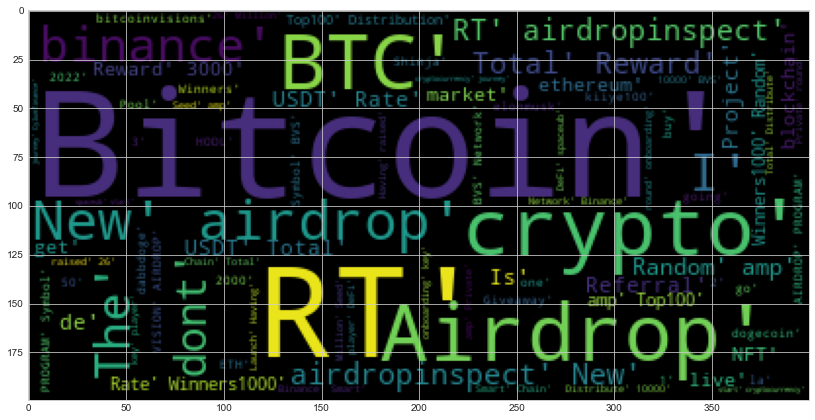

In [21]:
wc = WordCloud().generate(bitcoin_token_text)
plt.figure( figsize=(14,8) )
plt.imshow(wc)